In [1]:
import networkx as nx
import numpy as np
import pandas as pd
DG = nx.DiGraph()

In [155]:
import json

file = "/Users/zainabazizzaveri/Downloads/survey_1120.json"
with open(file) as f:
    data = json.load(f)
G = nx.node_link_graph(data, directed = True, multigraph = True, attrs = None)


In [4]:
G.number_of_nodes()

1721

In [233]:
a = G.nodes()
G.nodes['pasta']

{}

In [231]:
import matplotlib.pyplot as plt

In [273]:
nx.ancestors(G, 'olives')

{'beef (roast) hash',
 'chili con carne with beans',
 'chicken or turkey cordon bleu',
 'sukiyaki (stir fried beef and vegetables in soy sauce)',
 'oyster sauce (white sauce-based)',
 'johnnycake',
 'duck',
 'beef and noodles with cream or white sauce (mixture)',
 'tomato and celery',
 'goulash',
 'mustard cabbage',
 'beef and rice with cheese sauce (mixture)',
 'tripe',
 'peas and brown rice',
 'ravioli',
 'split pea soup',
 'biscayne codfish',
 'veal goulash with vegetables (including carrots',
 'green plantain with cracklings',
 'chocolate milk',
 'flour and water patty',
 'haddock cake or patty',
 'salad',
 'fruit cocktail or mix',
 'turkey',
 'sausage and vegetables (including carrots',
 'cornmeal',
 'chicken and vegetables in cream or white sauce (diet frozen meal)',
 'salisbury steak',
 'sweet potatoes and chicken',
 'mullet',
 'cocktail sauce',
 'codfish with starchy vegetables',
 'fried stuffed potatoes',
 'sea bass',
 'cheesecake with fruit',
 'veal cordon bleu',
 'chicken in

In [7]:
nx.descendants(G, 'egg')

nx.is_directed_acyclic_graph(G)

{'salad dressing', 'salt'}

In [19]:
T = nx.dfs_tree(G, source='pasta', depth_limit=2)

In [20]:
list(T.edges())

[('pasta', 'pasta with tomato sauce'),
 ('pasta', 'spaghetti'),
 ('pasta', 'egg'),
 ('pasta', 'cream'),
 ('pasta', 'butter'),
 ('pasta', 'vegetables'),
 ('pasta', 'broccoli'),
 ('pasta', 'crackers'),
 ('pasta', 'mint leaves'),
 ('pasta', 'nuts'),
 ('pasta', 'pasta mix'),
 ('spaghetti', 'sauce'),
 ('spaghetti', 'vegetable oil'),
 ('spaghetti', 'salt'),
 ('spaghetti', 'ground beef'),
 ('spaghetti', 'pork'),
 ('spaghetti', 'spaghetti sauce with vegetables'),
 ('spaghetti', 'noodles'),
 ('spaghetti', 'beef'),
 ('spaghetti', 'pasta with sliced franks in tomato sauce'),
 ('spaghetti', 'clam sauce'),
 ('spaghetti', 'oil'),
 ('spaghetti', 'garlic'),
 ('spaghetti', 'spices'),
 ('spaghetti', 'mollusks'),
 ('spaghetti', 'tomatoes'),
 ('spaghetti', 'chicken'),
 ('spaghetti', 'turkey'),
 ('spaghetti', 'tomato products'),
 ('spaghetti', 'cheese'),
 ('spaghetti', 'onions'),
 ('spaghetti', 'milk'),
 ('spaghetti', 'peas'),
 ('spaghetti', 'sugars'),
 ('spaghetti', 'beverages'),
 ('spaghetti', 'margarine

In [46]:
roots = (v for v, d in G.in_degree() if d == 0)
for root in roots:
    all_weights = []
    x = nx.descendants(G,root)
    for item in x:
        if G.has_edge(root,item):
            weight = G.get_edge_data(root, item) 
            all_weights.append(weight['weight'])
    print(all_weights)
    all_weights.sort(reverse = True)
    divider = sum(all_weights)
    print(divider)
    for item in x:
        if G.has_edge(root,item):
            G[root][item]['weight'] = G[root][item]['weight']/divider
            print(G[root][item]['weight'],root,item)

[4]
4
1.0 buttermilk milk
[1]
1
1.0 goat's milk milk
[1]
1
1.0 imitation milk milk
[4]
4
1.0 almond milk beverages
[1]
1
1.0 rice milk beverages
[1, 1]
2
0.5 coconut milk beverages
0.5 coconut milk nuts
[6, 44, 31, 7, 12]
100
0.06 chocolate milk syrup
0.44 chocolate milk milk
0.31 chocolate milk beverages
0.07 chocolate milk soymilk
0.12 chocolate milk syrups
[6, 3, 12, 20, 4]
45
0.13333333333333333 hot chocolate / cocoa syrup
0.06666666666666667 hot chocolate / cocoa cream
0.26666666666666666 hot chocolate / cocoa milk
0.4444444444444444 hot chocolate / cocoa beverages
0.08888888888888889 hot chocolate / cocoa soymilk
[4, 5, 2, 1]
12
0.3333333333333333 strawberry milk milk
0.4166666666666667 strawberry milk strawberry-flavor beverage mix
0.16666666666666666 strawberry milk beverages
0.08333333333333333 strawberry milk soymilk
[1, 6, 1, 5, 1, 1, 2, 4]
21
0.047619047619047616 milk shake sugars
0.2857142857142857 milk shake milk
0.047619047619047616 milk shake bananas
0.23809523809523808

[1, 1]
2
0.5 souse headcheese
0.5 souse beverages
[2, 1]
3
0.6666666666666666 turkey or chicken sausage sausage
0.3333333333333333 turkey or chicken sausage turkey sausage
[1]
1
1.0 turkey or chicken and pork sausage turkey and pork sausage
[1]
1
1.0 turkey or chicken pork sausage
[1]
1
1.0 vienna sausage sausage
[1, 1]
2
0.5 pickled sausage pork and beef sausage
0.5 pickled sausage salt
[1]
1
1.0 chicken or turkey loaf turkey breast
[1]
1
1.0 ham loaf pork roll
[1]
1
1.0 ham and cheese loaf ham and cheese
[1]
1
1.0 honey loaf peppered loaf
[1]
1
1.0 ham and pork luncheon meat
[1]
1
1.0 liverwurst pork
[1, 1]
2
0.5 luncheon loaf pickle and pimiento loaf
0.5 luncheon loaf olive loaf
[1, 1]
2
0.5 sandwich loaf peppered loaf
0.5 sandwich loaf dutch brand loaf
[1]
1
1.0 turkey pastrami pastrami
[1]
1
1.0 turkey salami salami
[2]
2
1.0 turkey or chicken breast turkey breast
[1]
1
1.0 meat spread or potted meat sandwich spread
[1]
1
1.0 chicken salad spread poultry salad sandwich spread
[1]


[1, 1, 1]
3
0.3333333333333333 frankfurter or hot dog chili con carne with beans
0.3333333333333333 frankfurter or hot dog wiener
0.3333333333333333 frankfurter or hot dog meatless
[1, 1, 1]
3
0.3333333333333333 frankfurters or hot dogs with tomato-based sauce (mixture) tomato products
0.3333333333333333 frankfurters or hot dogs with tomato-based sauce (mixture) salt
0.3333333333333333 frankfurters or hot dogs with tomato-based sauce (mixture) wiener
[1, 1, 1, 1, 1, 1, 1]
7
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) spices
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) tomatoes
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) lard
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) salt
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) peppers
0.14285714285714285 pork with chili and tomatoes (mixture) (puerco con chile) onions
0.1428571428

0.07142857142857142 beef and rice with cheese sauce (mixture) onions
0.07142857142857142 beef and rice with cheese sauce (mixture) sauce
[2, 2, 2, 1, 2, 2, 2, 2]
15
0.13333333333333333 meat loaf made with beef spices
0.13333333333333333 meat loaf made with beef bread
0.13333333333333333 meat loaf made with beef ground beef
0.06666666666666667 meat loaf made with beef tomato products
0.13333333333333333 meat loaf made with beef milk
0.13333333333333333 meat loaf made with beef salt
0.13333333333333333 meat loaf made with beef onions
0.13333333333333333 meat loaf made with beef egg
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
11
0.09090909090909091 beef wellington pate
0.09090909090909091 beef wellington oil
0.09090909090909091 beef wellington mushrooms
0.09090909090909091 beef wellington wheat flour
0.09090909090909091 beef wellington shortening
0.09090909090909091 beef wellington salt
0.09090909090909091 beef wellington beverages
0.09090909090909091 beef wellington margarine
0.09090909090909091 b

5
0.2 black bean salad tomatoes
0.2 black bean salad onions
0.2 black bean salad salad dressing
0.2 black bean salad corn
0.2 black bean salad beans
[1, 2, 1, 1, 1, 1, 1, 1, 1]
10
0.1 boston baked beans sugars
0.2 boston baked beans spices
0.1 boston baked beans vinegar
0.1 boston baked beans salt
0.1 boston baked beans beverages
0.1 boston baked beans onions
0.1 boston baked beans pork
0.1 boston baked beans molasses
0.1 boston baked beans beans
[1, 1]
2
0.5 refried beans with cheese refried beans
0.5 refried beans with cheese cheese
[1, 1, 1, 1, 1, 1]
6
0.16666666666666666 refried beans with meat garlic
0.16666666666666666 refried beans with meat refried beans
0.16666666666666666 refried beans with meat salt
0.16666666666666666 refried beans with meat onions
0.16666666666666666 refried beans with meat ham
0.16666666666666666 refried beans with meat beans
[1]
1
1.0 beans and franks beans
[1]
1
1.0 pork and beans beans
[3, 1, 1, 1, 1, 1, 1, 1, 1]
11
0.2727272727272727 falafel spices
0.

0.08333333333333333 chicken or turkey cordon bleu egg
0.08333333333333333 chicken or turkey cordon bleu chicken
0.08333333333333333 chicken or turkey cordon bleu parsley
0.08333333333333333 chicken or turkey cordon bleu ham
0.08333333333333333 chicken or turkey cordon bleu bread crumbs
[1, 1, 1, 1, 2, 1, 2, 1]
10
0.1 chicken or turkey parmigiana wheat flour
0.1 chicken or turkey parmigiana tomato products
0.1 chicken or turkey parmigiana salt
0.1 chicken or turkey parmigiana vegetable oil
0.2 chicken or turkey parmigiana cheese
0.1 chicken or turkey parmigiana egg
0.2 chicken or turkey parmigiana chicken
0.1 chicken or turkey parmigiana bread crumbs
[1, 1, 1, 1, 1, 1, 1]
7
0.14285714285714285 chicken kiev wheat flour
0.14285714285714285 chicken kiev shortening
0.14285714285714285 chicken kiev butter
0.14285714285714285 chicken kiev salt
0.14285714285714285 chicken kiev egg
0.14285714285714285 chicken kiev chicken
0.14285714285714285 chicken kiev bread crumbs
[1, 1, 1, 1, 1, 1, 1, 1]
8


0.25 haddock cake or patty egg
[1, 1, 1, 1, 1]
5
0.2 shrimp cake or patty onions
0.2 shrimp cake or patty salad dressing
0.2 shrimp cake or patty egg
0.2 shrimp cake or patty dried shrimp
0.2 shrimp cake or patty bread crumbs
[1, 1, 2, 1, 1, 1, 1]
8
0.125 shrimp with crab stuffing wheat flour
0.125 shrimp with crab stuffing salt
0.25 shrimp with crab stuffing crustaceans
0.125 shrimp with crab stuffing margarine
0.125 shrimp with crab stuffing onions
0.125 shrimp with crab stuffing egg
0.125 shrimp with crab stuffing bread crumbs
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
11
0.09090909090909091 shrimp toast spices
0.09090909090909091 shrimp toast bread
0.09090909090909091 shrimp toast tomatoes
0.09090909090909091 shrimp toast alcoholic beverage
0.09090909090909091 shrimp toast wheat starch
0.09090909090909091 shrimp toast salt
0.09090909090909091 shrimp toast ginger root
0.09090909090909091 shrimp toast crustaceans
0.09090909090909091 shrimp toast onions
0.09090909090909091 shrimp toast egg
0.0

0.1111111111111111 beef and broccoli wheat starch
0.1111111111111111 beef and broccoli vegetable oil
0.1111111111111111 beef and broccoli beverages
0.1111111111111111 beef and broccoli tamari
0.1111111111111111 beef and broccoli beef
0.1111111111111111 beef and broccoli broccoli
[1]
1
1.0 szechuan beef beef and vegetables
[1]
1
1.0 hunan beef beef and vegetables
[1, 1]
2
0.5 beef chow mein or chop suey vegetable chow mein
0.5 beef chow mein or chop suey beef
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]
15
0.06666666666666667 kung pao beef oil
0.06666666666666667 kung pao beef garlic
0.06666666666666667 kung pao beef peanuts
0.06666666666666667 kung pao beef vinegar
0.06666666666666667 kung pao beef wheat starch
0.06666666666666667 kung pao beef vegetable oil
0.06666666666666667 kung pao beef ginger root
0.13333333333333333 kung pao beef peppers
0.06666666666666667 kung pao beef onions
0.06666666666666667 kung pao beef soup
0.06666666666666667 kung pao beef tamari
0.06666666666666667 kung pa

0.125 tuna casserole with vegetables milk
0.125 tuna casserole with vegetables butter
0.125 tuna casserole with vegetables peppers
0.125 tuna casserole with vegetables onions
0.125 tuna casserole with vegetables soup
0.125 tuna casserole with vegetables fish
0.125 tuna casserole with vegetables bread crumbs
[1, 2, 2, 4, 4, 2, 1, 4, 4, 1, 4, 2, 2, 2, 2]
37
0.02702702702702703 shellfish mixture and vegetables mushrooms
0.05405405405405406 shellfish mixture and vegetables garlic
0.05405405405405406 shellfish mixture and vegetables milk
0.10810810810810811 shellfish mixture and vegetables vegetable oil
0.10810810810810811 shellfish mixture and vegetables mollusks
0.05405405405405406 shellfish mixture and vegetables ginger root
0.02702702702702703 shellfish mixture and vegetables peppers
0.10810810810810811 shellfish mixture and vegetables onions
0.10810810810810811 shellfish mixture and vegetables soup
0.02702702702702703 shellfish mixture and vegetables corn
0.10810810810810811 shellfish 

0.05263157894736842 turkey with dressing corn
0.05263157894736842 turkey with dressing peas and carrots
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
16
0.0625 turkey with vegetable sugars
0.125 turkey with vegetable spices
0.0625 turkey with vegetable turkey
0.0625 turkey with vegetable tomato products
0.0625 turkey with vegetable croutons
0.0625 turkey with vegetable raisins
0.0625 turkey with vegetable wheat starch
0.0625 turkey with vegetable salt
0.0625 turkey with vegetable celery juice
0.0625 turkey with vegetable beverages
0.0625 turkey with vegetable onions
0.0625 turkey with vegetable soup
0.0625 turkey with vegetable fat
0.0625 turkey with vegetable carrots
0.0625 turkey with vegetable beans
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
12
0.08333333333333333 turkey tetrazzini (frozen meal) pasta
0.08333333333333333 turkey tetrazzini (frozen meal) mushrooms
0.08333333333333333 turkey tetrazzini (frozen meal) turkey
0.08333333333333333 turkey tetrazzini (frozen meal) wheat flour
0.083

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
17
0.058823529411764705 tamal in a leaf olives
0.058823529411764705 tamal in a leaf spices
0.058823529411764705 tamal in a leaf tomatoes
0.058823529411764705 tamal in a leaf oil
0.058823529411764705 tamal in a leaf garlic
0.058823529411764705 tamal in a leaf tomato products
0.058823529411764705 tamal in a leaf milk
0.058823529411764705 tamal in a leaf vinegar
0.058823529411764705 tamal in a leaf raisins
0.058823529411764705 tamal in a leaf sweet chili pepper
0.058823529411764705 tamal in a leaf salt
0.058823529411764705 tamal in a leaf plums
0.058823529411764705 tamal in a leaf margarine
0.058823529411764705 tamal in a leaf onions
0.058823529411764705 tamal in a leaf pork
0.058823529411764705 tamal in a leaf corn
0.058823529411764705 tamal in a leaf egg
[2, 1, 4, 1, 4, 4, 2, 1, 1, 4, 2, 3, 4, 2, 4, 2, 2, 2, 1, 1]
47
0.0425531914893617 empanada olives
0.02127659574468085 empanada sugars
0.0851063829787234 empanada spices
0.021276595744

[1, 1]
2
0.5 flavored rice mixture with cheese rice mix
0.5 flavored rice mixture with cheese beverages
[1, 1, 1, 1, 1, 1, 1]
7
0.14285714285714285 flavored rice spices
0.14285714285714285 flavored rice wild rice
0.14285714285714285 flavored rice salt
0.14285714285714285 flavored rice rice
0.14285714285714285 flavored rice beverages
0.14285714285714285 flavored rice margarine
0.14285714285714285 flavored rice onions
[1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1]
15
0.06666666666666667 flavored rice and pasta mixture sugars
0.06666666666666667 flavored rice and pasta mixture milk protein
0.13333333333333333 flavored rice and pasta mixture spices
0.06666666666666667 flavored rice and pasta mixture pasta
0.06666666666666667 flavored rice and pasta mixture rice and vermicelli mix
0.06666666666666667 flavored rice and pasta mixture butter
0.06666666666666667 flavored rice and pasta mixture salt
0.06666666666666667 flavored rice and pasta mixture rice
0.06666666666666667 flavored rice and pasta mixtur

0.09090909090909091 portuguese bean soup potatoes
0.09090909090909091 portuguese bean soup onions
0.09090909090909091 portuguese bean soup soup
0.09090909090909091 portuguese bean soup parsley
0.09090909090909091 portuguese bean soup carrots
0.09090909090909091 portuguese bean soup beans
[1, 1, 3, 1, 1, 1, 1]
9
0.1111111111111111 bean and ham soup celery juice
0.1111111111111111 bean and ham soup onions
0.3333333333333333 bean and ham soup soup
0.1111111111111111 bean and ham soup pork
0.1111111111111111 bean and ham soup parsley
0.1111111111111111 bean and ham soup carrots
0.1111111111111111 bean and ham soup beans
[1]
1
1.0 liquid from stewed kidney beans beans
[1]
1
1.0 pea and ham soup soup
[1, 1, 1, 1, 1, 1, 1]
7
0.14285714285714285 garbanzo bean or chickpea soup celery juice
0.14285714285714285 garbanzo bean or chickpea soup chickpeas
0.14285714285714285 garbanzo bean or chickpea soup onions
0.14285714285714285 garbanzo bean or chickpea soup soup
0.14285714285714285 garbanzo bean

[7]
7
1.0 cracker crackers
[1, 1, 12, 1, 1]
16
0.0625 salty snacks crackers
0.0625 salty snacks cheese puffs and twists
0.75 salty snacks snacks
0.0625 salty snacks potato
0.0625 salty snacks tortilla chips
[4]
4
1.0 salty snack mixture snacks
[1]
1
1.0 pita chips bar
[1]
1
1.0 shrimp chips shrimp
[1, 1, 3, 1, 1, 1]
8
0.125 multigrain mixture oil
0.125 multigrain mixture crackers
0.375 multigrain mixture snacks
0.125 multigrain mixture salt
0.125 multigrain mixture cheese
0.125 multigrain mixture bread sticks
[1]
1
1.0 oriental party mix snacks
[1]
1
1.0 bagel chip bar
[2, 2, 2, 1, 2, 2, 2]
13
0.15384615384615385 funnel cake sugars
0.15384615384615385 funnel cake wheat flour
0.15384615384615385 funnel cake milk
0.07692307692307693 funnel cake toppings
0.15384615384615385 funnel cake salt
0.15384615384615385 funnel cake leavening agents
0.15384615384615385 funnel cake egg
[7, 12, 12, 30, 8, 27, 1, 6, 39]
142
0.04929577464788732 grits table fat
0.08450704225352113 grits milk
0.0845070422

0.3333333333333333 fruit cocktail or mix cherries
0.16666666666666666 fruit cocktail or mix boysenberries
0.16666666666666666 fruit cocktail or mix grapes
0.16666666666666666 fruit cocktail or mix raspberries
[1]
1
1.0 tropical fruit cocktail fruit cocktail
[1, 1, 1, 1, 1]
5
0.2 apple salad apple
0.2 apple salad celery
0.2 apple salad salad dressing
0.2 apple salad grapes
0.2 apple salad nuts
[1, 1, 1, 1, 1]
5
0.2 banana whip sugars
0.2 banana whip bananas
0.2 banana whip salt
0.2 banana whip lemon juice
0.2 banana whip egg
[1, 1, 1, 1, 1]
5
0.2 prune whip sugars
0.2 prune whip salt
0.2 prune whip lemon juice
0.2 prune whip plums
0.2 prune whip egg
[1, 1]
2
0.5 fried dwarf banana bananas
0.5 fried dwarf banana vegetable oil
[1, 1, 1]
3
0.3333333333333333 fried dwarf banana with cheese bananas
0.3333333333333333 fried dwarf banana with cheese vegetable oil
0.3333333333333333 fried dwarf banana with cheese cheese
[1, 1, 1, 1, 1]
5
0.2 fruit dessert with cream and/or pudding and nuts nuts

0.06451612903225806 mixed vegetable vegetable oil
0.3870967741935484 mixed vegetable vegetables
0.06451612903225806 mixed vegetable margarine
[6, 2, 1, 6, 1, 1, 6]
23
0.2608695652173913 peas and corn peas
0.08695652173913043 peas and corn table fat
0.043478260869565216 peas and corn butter
0.2608695652173913 peas and corn salt
0.043478260869565216 peas and corn vegetable oil
0.043478260869565216 peas and corn margarine
0.2608695652173913 peas and corn corn
[6, 6, 2, 1, 6, 1, 1]
23
0.2608695652173913 peas and mushrooms peas
0.2608695652173913 peas and mushrooms mushrooms
0.08695652173913043 peas and mushrooms table fat
0.043478260869565216 peas and mushrooms butter
0.2608695652173913 peas and mushrooms salt
0.043478260869565216 peas and mushrooms vegetable oil
0.043478260869565216 peas and mushrooms margarine
[1, 3, 1, 3, 3]
11
0.09090909090909091 cowpeas with snap beans table fat
0.2727272727272727 cowpeas with snap beans salt
0.09090909090909091 cowpeas with snap beans vegetable oil
0

0.125 fried stuffed potatoes puerto rican seasoning with ham
[1, 1, 1, 1, 1]
5
0.2 potato and ham fritters salt
0.2 potato and ham fritters vegetable oil
0.2 potato and ham fritters potatoes
0.2 potato and ham fritters pork
0.2 potato and ham fritters egg
[1, 1, 1]
3
0.3333333333333333 green plantain with cracklings plantains
0.3333333333333333 green plantain with cracklings vegetable oil
0.3333333333333333 green plantain with cracklings pork
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
14
0.07142857142857142 ripe plantain fritters olives
0.07142857142857142 ripe plantain fritters spices
0.07142857142857142 ripe plantain fritters plantains
0.07142857142857142 ripe plantain fritters tomatoes
0.07142857142857142 ripe plantain fritters ground beef
0.07142857142857142 ripe plantain fritters garlic
0.07142857142857142 ripe plantain fritters tomato products
0.07142857142857142 ripe plantain fritters sweet chili pepper
0.07142857142857142 ripe plantain fritters vegetable oil
0.07142857142857142 ri

In [337]:
def get_successors(node):
        p = G.successors(node)
        return p

In [338]:
def get_current_sucessors(x,starting_node):
    list_of_weights = []
    list_of_succ = []

    
    for item in x:
        list_of_succ.append(item)
        x1 = G.get_edge_data(starting_node,item) 
        
        if x1 != None:
            list_of_weights.append(x1['weight'])
        else:
            continue
            
    divider = sum(list_of_weights)
    lista.append(starting_node)
    #print(lista)
    
    for item,x in enumerate(list_of_weights):
        list_of_weights[item] = float(x/divider)
        
    if len((list_of_succ))>0:
        node = np.random.choice(np.array(list_of_succ), p=list_of_weights)
        ind = list_of_succ.index(node)
        b = lista[-1]
        
        if b in G:
            if G.has_edge(b,starting_node):
                parentweight1 = G.get_edge_data(b, starting_node)
                a = get_successors(b)

                for item in a:
                    x1 = G.get_edge_data(lista[-1],item)

                    if x1 != None:
                        list_of_weights.append(x1['weight'])
                divider = sum(list_of_weights)
                weightx = (parentweight1['weight']/divider)*list_of_weights[ind]       
            else:
                weightx = 0
        listb = [node, weightx]
        return listb
    else:
        return None

In [419]:
lista = []

In [420]:
starting_node = 'pasta'
list_x = get_successors(starting_node)
list_y = get_successors(starting_node)
freq = {}
montecarlo = 1000

for n in range(montecarlo):
    list_x = get_successors(starting_node)
    listx = get_current_sucessors(list_x,starting_node)
    
    if (listx[0] in freq) and listx[1]>0:
        
        if (h in freq): 
            freq[listx[0]] += 1
        else: 
            freq[listx[0]] = 1

for n in list_y:

    for i in range(montecarlo):
        x = get_successors(n)
       
        if x!= None :
            listx = get_current_sucessors(x,n)
            
            if listx != None:
                
                if (listx[0] in freq) and listx[1]>0: 
                    freq[listx[0]] += 1*listx[1]
                elif listx[1]>0: 
                    freq[listx[0]] = 1*listx[1]
        else:
            break


In [421]:
#del freq[None]

print(freq)

{'carrots': 38.25884365249288, 'pasta': 1.1141247579605098, 'cheese': 430.3558792391238, 'sugars': 12.85155753661461, 'sauce': 1.7627538171462334, 'beverages': 75.90506898178614, 'pasta with tomato sauce': 0.02068437180796731, 'salt': 279.44889392470316, 'vegetable oil': 9.081653180580249, 'crackers': 465.5228106921667, 'wheat starch': 0.14496263756273053, 'ground beef': 195.7925565949605, 'chicken': 90.15475530351905, 'egg': 29.166300393780304, 'oil': 963.2576197360326, 'nuts': 500.1043478259121, 'garlic': 219.13487277910153, 'pork': 23.67414496101051, 'broccoli': 35.97442841989515, 'onions': 57.26401691558461, 'tomato products': 0.20828282118038377, 'spices': 1.431465369478949, 'wheat flour': 2.049741397921513, 'margarine': 18.90054306286535, 'mint leaves': 0.10913500938012995, 'soy flour': 0.010342185903983659, 'soup': 7.85226515798355, 'vegetables': 0.18903223845871234, 'fat': 21.516087844739612, 'cream': 708.2435101600306, 'spaghetti': 0.028085511082965847, 'milk': 451.44961151401

In [422]:

sorted_d = sorted((value, key) for (key,value) in freq.items())
items= sorted_d[-20:-1]
items

[(22.000757911145243, 'cookies'),
 (23.67414496101051, 'pork'),
 (25.501710761983464, 'salad dressing'),
 (29.166300393780304, 'egg'),
 (35.97442841989515, 'broccoli'),
 (38.25884365249288, 'carrots'),
 (57.26401691558461, 'onions'),
 (75.90506898178614, 'beverages'),
 (90.15475530351905, 'chicken'),
 (108.43175848630521, 'margarine-like spread'),
 (195.7925565949605, 'ground beef'),
 (219.13487277910153, 'garlic'),
 (279.44889392470316, 'salt'),
 (430.3558792391238, 'cheese'),
 (451.4496115140114, 'milk'),
 (465.5228106921667, 'crackers'),
 (500.1043478259121, 'nuts'),
 (690.4061601626014, 'butter'),
 (708.2435101600306, 'cream')]

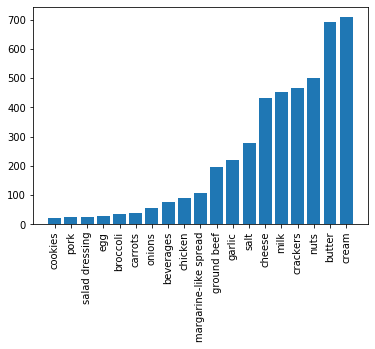

In [423]:
ys, labels = zip(*items)
plt.bar(labels,ys, align='center')
plt.xticks(xs, labels,rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.savefig('pastax.png',dpi=1000,quality = 95,bbox_inches = "tight")